## 데이터 분석 및 전처리

### 5/9 실습

### 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### 구글 서버와 내 드라이브 연결하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### 작업 디렉토리 변경
%cd '/content/drive/MyDrive/KDT/비정형텍스트분석'

/content/drive/MyDrive/KDT/비정형텍스트분석


In [ ]:
### 데이터프레임 생성

# 파일 경로 설정
train_file_path = 'ratings_train.txt'
test_file_path = 'ratings_test.txt'

# pd.read_csv() --> 데이터프레임 생성
train_df = pd.read_csv(train_file_path, delimiter='\t')
test_df = pd.read_csv(test_file_path, delimiter='\t')

# 결과 확인하기
print(f'학습용 데이터 : \n{train_df}')
print('-'*80)
print(f'평가용 데이터 : \n{test_df}')

학습용 데이터 : 
              id                                           document  label
0        9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1        3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2       10265843                                  너무재밓었다그래서보는것을추천한다      0
3        9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4        6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
...          ...                                                ...    ...
149995   6222902                                인간이 문제지.. 소는 뭔죄인가..      0
149996   8549745                                      평점이 너무 낮아서...      1
149997   9311800                    이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?      0
149998   2376369                        청춘 영화의 최고봉.방황과 우울했던 날들의 자화상      1
149999   9619869                           한국 영화 최초로 수간하는 내용이 담긴 영화      0

[150000 rows x 3 columns]
--------------------------------------------------------------

In [ ]:
### 누락 데이터 확인

# 학습용 데이터 확인
nulls_train = train_df.isnull().sum()

# 평가용 데이터 확인
nulls_test = test_df.isnull().sum()

# 결과 확인하기
print(f'학습용 데이터의 누락 데이터 확인 : \n{nulls_train}')
print('-'*80)
print(f'평가용 데이터의 누락 데이터 확인 : \n{nulls_test}')

학습용 데이터의 누락 데이터 확인 : 
id          0
document    5
label       0
dtype: int64
--------------------------------------------------------------------------------
평가용 데이터의 누락 데이터 확인 : 
id          0
document    3
label       0
dtype: int64


In [ ]:
### 누락 데이터 제거 --> dropna()

# 학습용 데이터 
train_df_cleaned = train_df.dropna()

# 평가용 데이터
test_df_cleaned = test_df.dropna()

# 결과 확인하기 --> info() 사용
print('학습용 데이터에 대한 처리 결과  :')
train_df_cleaned.info()
print('-'*80)
print('평가용 데이터에 대한 처리 결과 : ')
test_df_cleaned.info()

학습용 데이터에 대한 처리 결과  :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB
--------------------------------------------------------------------------------
평가용 데이터에 대한 처리 결과 : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
### index 재설정

# 학습용 데이터
train_df_cleaned = train_df_cleaned.reset_index(drop=True)

# 평가용 데이터
test_df_cleaned = test_df_cleaned.reset_index(drop=True)

# 결과 확인하기 --> info() 사용
print('학습용 데이터에 대한 처리 결과  :')
train_df_cleaned.info()
print('-'*80)
print('평가용 데이터에 대한 처리 결과 : ')
test_df_cleaned.info()

학습용 데이터에 대한 처리 결과  :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149995 entries, 0 to 149994
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
--------------------------------------------------------------------------------
평가용 데이터에 대한 처리 결과 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49997 entries, 0 to 49996
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


### 데이터 분석

#### label 컬럼의 항목별 분포 분석

In [ ]:
# label 컬럼 --> 항목별 비율 --> value_counts(normalize=True)

# 학습용 데이터
train_counts = train_df_cleaned.label.value_counts(normalize=True)
print(train_counts)

print('-'*80)

# 평가용 데이터
test_counts = test_df_cleaned.label.value_counts(normalize=True)
print(test_counts)

0    0.50115
1    0.49885
Name: label, dtype: float64
--------------------------------------------------------------------------------
1    0.50345
0    0.49655
Name: label, dtype: float64


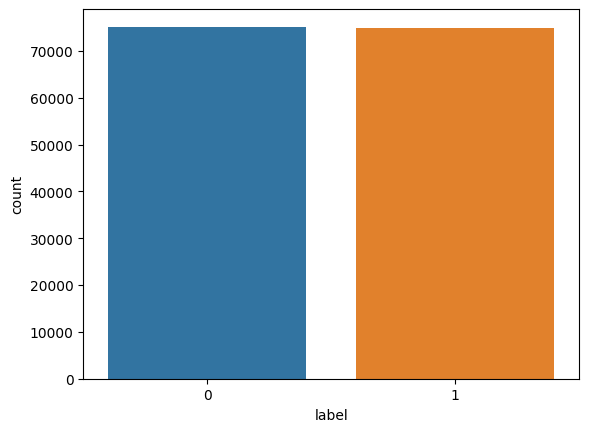

--------------------------------------------------------------------------------


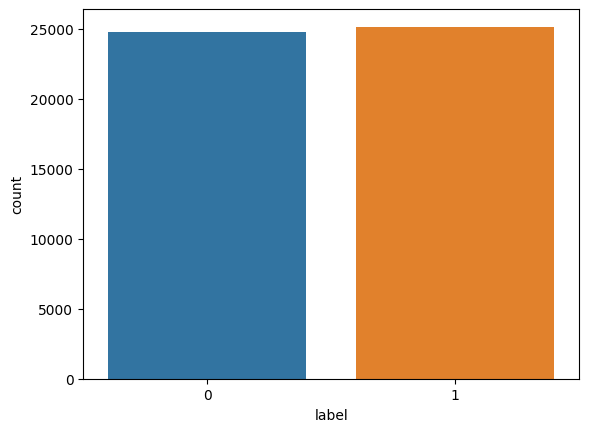

In [ ]:
### label 컬럼 --> 항목별 분포 시각화

# 학습용 데이터
sns.countplot(data=train_df_cleaned, x='label')
plt.show()

print('-'*80)

# 평가용 데이터
sns.countplot(data=test_df_cleaned, x='label')
plt.show()

### 데이터 전처리

In [ ]:
### konlpy, Mecab 형태소 분석기 설치 스크립트 실행 - 설치하는데 2분 10초 ~ 20초 
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-05-09 05:51:59--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-05-09 05:51:59--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3822b64eb61f81cea0b6cac313.dl.dropboxusercontent.com/cd/0/get/B7ue_oS3kogGsHHoaSbi_LYiLzeC9s9YY8Q2xiPxPDHSUnWdn5d1B7NDGOid1-bYBJmDnKpzUdV-fPbwIicl1sd50FrfULipV1lwj7CYZvJaJzglKEE6j5Vi3D0Zu8yrBLdN-AKcytt84qIQgMZc3qo1bd7gl4tNuHNHz_LRsjV2NWavJ5m2icL8VU_QAuraQkA/file?dl=1# [following]
--2023-05-09 05:51:59--  https://uc3822b64eb61f81cea0b6cac313.dl.dropboxusercontent.com/cd/0/get/B7ue_oS3kogG

In [ ]:
### 필요한 라이브러리 임폴트
import re
import pandas as pd
import numpy as np
from konlpy.tag import Okt, Mecab

In [ ]:
### 전철리 함수를 정의하기 위한 테스트 데이터 생성

# 리뷰 1개 추출
review = train_df_cleaned.document[0]

# 결과 확인하기
print(review)

아 더빙.. 진짜 짜증나네요 목소리


In [ ]:
### 한글과 공백을 제외한 나머지 문자, 숫자, 기호 제거
pattern = '[^가-힣 ]'
review_text = re.sub(pattern, "", review)

# 결과 확인하기
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [ ]:
### 형태소 분석(1) --> OKt 형태소 분석기 사용

# 형태소 분석기 객체 생성
okt = Okt()

# 토큰화 실행
tokenized_text_okt = okt.morphs(review_text, stem=True)

# 결과 확인하기
print(tokenized_text_okt)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [ ]:
### 형태소 분석(2) --> Mecab 형태소 분석기 사용

# 형태소 분석기 객체 생성
mecab = Mecab()

# 토큰화 실행
tokenized_text_mecab = mecab.morphs(review_text)

# 결과 확인하기
print(tokenized_text_mecab)

['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']


In [ ]:
### 불용어 제거(1) --> Okt 형태소 분석기 --> 형태소 분석 결과

clean_words = []

for token in tokenized_text_okt:
    if len(token) > 1:
        clean_words.append(token)

# 결과 확인하기
print(clean_words)

['더빙', '진짜', '짜증나다', '목소리']


In [ ]:
### 불용어 제거(2) --> Mecab 형태소 분석기 --> 형태소 분석 결과

clean_words = []

for token in tokenized_text_mecab:
    if len(token) > 1:
        clean_words.append(token)

# 결과 확인하기
print(clean_words)

['진짜', '짜증', '네요', '목소리']


In [ ]:
### 전처리 함수 정의(1) --> 형태소 분석기 : Okt

def preprocessing_okt(review, okt, remove_stopwords=False):
    # 1. 한글 및 공백을 제외한 문자, 숫자, 기호 등 모두 제거 
    review_text = re.sub('[^가-힣 ]', "", review)

    # 2. okt 객체를 활용해서 형태소 단위로 나눈다
    word_review = okt.morphs(review_text, stem=True)

    if remove_stopwords:
        # 3. 불용어 제거
        clean_words = []

        for token in word_review:
            if len(token) > 1:
                clean_words.append(token)
        print(f'clean_words : {clean_words}')

        clean_review = ' '.join(clean_words)

    else:
        clean_review = ' '.join(word_review)

    return clean_review

In [ ]:
### 전처리 함수 정의(2) --> 형태소 분석기 : Mecab

def preprocessing_mecab(review, mecab, remove_stopwords=False):
    # 1. 한글 및 공백을 제외한 문자, 숫자, 기호 등 모두 제거 
    review_text = re.sub('[^가-힣 ]', "", review)

    # 2. mecab 객체를 활용해서 형태소 단위로 나눈다
    word_review = mecab.morphs(review_text)

    if remove_stopwords:
        # 3. 불용어 제거
        clean_words = []

        for token in word_review:
            if len(token) > 1:
                clean_words.append(token)
        print(f'clean_words : {clean_words}')

        clean_review = ' '.join(clean_words)

    else:
        clean_review = ' '.join(word_review)

    return clean_review

In [ ]:
### document 컬럼에 대해서 전처리 함수 실행(1)

# okt 객체 생성
okt = Okt()

# 함수 실행
clean_train_review_okt = []

for review in train_df_cleaned.document.values:
    clean_review = preprocessing_okt(review, okt, remove_stopwords=True)
    clean_train_review_okt.append(clean_review)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
clean_words : ['정치', '현실', '모습', '담다', '영화', '열정', '으로', '채우다', '스티븐', '냉소', '정치', '겪다', '변하다', '모습', '소름끼치다', '담다', '진짜', '서스펜스', '스릴러', '이며', '뛰어나다', '배우', '연기', '보다', '재미', '있다', '남자', '여자', '관계', '조심하다', '하다', '정치', '이면']
clean_words : ['인사', '이드', '보고', '생각나다', '찾아오다', '어리다', '보다', '그때', '느끼다', '감동', '아직도', '생생하다', '로봇', '감정', '이렇게', '표현', '해내다', '있다']
clean_words : ['년대', '혁명', '가다', '추억', '명작', '이지', '정말', '재미있다', '즐기다', '보다', '년대', '향수', '느끼다']
clean_words : ['쥬드', '멋지다', '미소', '반하다', '같다', '표정', '연기', '디테일', '살다', '카메론', '너무', '예쁘다']
clean_words : ['버리다']
clean_words : ['지루하다', '느슨하다']
clean_words : ['필요없다', '쓰레기', '정말', '정말', '기대하다', '더욱', '실망', '크다']
clean_words : ['차다', '이래저래', '이해', '하다', '난해하다', '영화']
clean_words : ['팔마', '이름', '하다', '망작', '점도', '아깝다']
clean_words : ['제이슨', '쌍벽', '이루다', '살인마', '지만', '강하다']
clean_words : ['이렇다', '만들다', '바보', '인가']
clean_words : ['보아', '누나', '한테', '미안하다', '솔직하다', '하다', '노잼', '이야', '스텝업', '따르다', '하다', '똑바로

In [ ]:
### document 컬럼에 대해서 전처리 함수 실행(2)

# mecab 객체 생성
mecab = Mecab()

# 함수 실행
clean_train_review_mecab = []

for review in train_df_cleaned.document.values:
    clean_review = preprocessing_mecab(review, mecab, remove_stopwords=True)
    clean_train_review_mecab.append(clean_review)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
clean_words : ['정치', '현실', '모습', '영화', '열정', '으로', '채워졌', '스티븐', '냉소', '정치', '변하', '모습', '소름', '끼치', '진짜', '서스펜스', '스릴러', '뛰어난', '배우', '연기', '재미', '남자', '여자', '관계', '조심', '해야', '정치', '이면']
clean_words : ['인사', '읏보고', '생각나', '어렸', '지만', '그때', '느꼈', '감동', '아직', '생생', '로봇', '감정', '이렇게', '표현', '해낼', '다니']
clean_words : ['혁명', '가져다', '추억', '명작', '정말', '재미있', '즐겨', '향수', '느끼', '는구나']
clean_words : ['쥬드로', '미소', '반할', '표정', '연기', '디테일', '카메론', '너무', '예쁨']
clean_words : ['버려라']
clean_words : ['지루', '느슨']
clean_words : ['필요', '쓰레기', '정말', '정말', '기대', '했었', '더욱', '실망감', '큽니다']
clean_words : ['이래저래', '이해', '난해', '영화']
clean_words : ['드팔마', '이름값', '아깝']
clean_words : ['제이슨', '쌍벽', '이루', '살인마', '지만']
clean_words : ['이런', '만드', '바보', '인가']
clean_words : ['누나', '한테', '미안', '한데', '솔직히', '스텝업', '따라', '할꺼', '똑바로', '따라', '갑자기', '하고', '나오', '애국심', '난타', '홍보', '한다고', '그런', '은데', '마음', '갸륵', '한데', '재미', '모르', '글고', '설정', '일본인', '드만']
clean_words : ['앞뒤', '분간', '원초', '본능',

In [ ]:
### 전처리 한 결과 --> 데이터프레임 생성(1)
clean_train_df_okt = pd.DataFrame({'document':clean_train_review_okt, 'label':train_df_cleaned.label})

# 결과 확인하기
clean_train_df_okt

,document,label
0,더빙 진짜 짜증나다 목소리,0
1,포스터 보고 초딩 영화 오버 연기 조차 가볍다 않다,1
2,무재 밓었 다그 래서 보다 추천,0
3,교도소 이야기 구먼 솔직하다 재미 없다 평점 조정,0
4,사이 몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 에서 늙다 보이다 하다 커스틴 ...,1
...,...,...
149990,인간 문제 죄인,0
149991,평점 너무 낮다,1
149992,한국인 거들다 먹거리 필리핀 혼혈 착하다,0
149993,청춘 영화 최고봉 방황 우울하다 자화상,1


In [ ]:
### 길이가 0인 문자열 확인 --> 예시

text_list = []
clean_review = ' '.join(text_list)

print(clean_review)
print(len(clean_review))


0


In [ ]:
### 길이가 0인 문자열 제거 --> 불리언 배열 생성
bool_array = clean_train_df_okt.document.apply(lambda x:len(x)>0).values

# 결과 확인하기
print(bool_array)

[ True  True  True ...  True  True  True]


In [ ]:
### 리뷰의 길이가 0보다 큰 데이터 추출
train_df_okt = clean_train_df_okt.loc[bool_array, :]

# 결과 확인하기
train_df_okt

,document,label
0,더빙 진짜 짜증나다 목소리,0
1,포스터 보고 초딩 영화 오버 연기 조차 가볍다 않다,1
2,무재 밓었 다그 래서 보다 추천,0
3,교도소 이야기 구먼 솔직하다 재미 없다 평점 조정,0
4,사이 몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 에서 늙다 보이다 하다 커스틴 ...,1
...,...,...
149990,인간 문제 죄인,0
149991,평점 너무 낮다,1
149992,한국인 거들다 먹거리 필리핀 혼혈 착하다,0
149993,청춘 영화 최고봉 방황 우울하다 자화상,1


In [ ]:
### 전처리 한 결과 --> 데이터프레임 생성(2)
clean_train_df_mecab = pd.DataFrame({'document':clean_train_review_mecab, 'label':train_df_cleaned.label})

# 결과 확인하기
clean_train_df_mecab

,document,label
0,진짜 짜증 네요 목소리,0
1,포스터 보고 초딩 영화 오버 연기 조차 가볍 구나,1
2,너무 밓었다그래서보는것을추천한다,0
3,교도소 이야기 구먼 솔직히 재미 평점 조정,0
4,사이몬페그 익살 스런 연기 돋보였 영화 스파이더맨 에서 보이 커스틴 던스트 너무나 ...,1
...,...,...
149990,인간 문제지 인가,0
149991,평점 너무 아서,1
149992,이게 한국인 거들먹거리 필리핀 혼혈 착하,0
149993,청춘 영화 최고봉 방황 우울 자화상,1


In [ ]:
### 길이가 0인 문자열 제거 --> 불리언 배열 생성
bool_array = clean_train_df_mecab.document.apply(lambda x:len(x)>0).values

# 결과 확인하기
print(bool_array)

[ True  True  True ...  True  True  True]


In [ ]:
### 리뷰의 길이가 0보다 큰 데이터 추출
train_df_mecab = clean_train_df_mecab.loc[bool_array, :]

# 결과 확인하기
train_df_mecab

,document,label
0,진짜 짜증 네요 목소리,0
1,포스터 보고 초딩 영화 오버 연기 조차 가볍 구나,1
2,너무 밓었다그래서보는것을추천한다,0
3,교도소 이야기 구먼 솔직히 재미 평점 조정,0
4,사이몬페그 익살 스런 연기 돋보였 영화 스파이더맨 에서 보이 커스틴 던스트 너무나 ...,1
...,...,...
149990,인간 문제지 인가,0
149991,평점 너무 아서,1
149992,이게 한국인 거들먹거리 필리핀 혼혈 착하,0
149993,청춘 영화 최고봉 방황 우울 자화상,1


### 결과 저장

In [ ]:
### 정제된 텍스틀 csv 형태로 저장
train_df_okt.to_csv('train_df_okt.csv', index=False)
train_df_mecab.to_csv('train_df_mecab.csv', index=False)

In [ ]:
### 저장된 데이터 불러오기
train_df_okt = pd.read_csv('train_df_okt.csv')
train_df_mecab = pd.read_csv('train_df_mecab.csv')

In [ ]:
### 결과 확인하기(1)
train_df_okt

,document,label
0,더빙 진짜 짜증나다 목소리,0
1,포스터 보고 초딩 영화 오버 연기 조차 가볍다 않다,1
2,무재 밓었 다그 래서 보다 추천,0
3,교도소 이야기 구먼 솔직하다 재미 없다 평점 조정,0
4,사이 몬페 익살스럽다 연기 돋보이다 영화 스파이더맨 에서 늙다 보이다 하다 커스틴 ...,1
...,...,...
147403,인간 문제 죄인,0
147404,평점 너무 낮다,1
147405,한국인 거들다 먹거리 필리핀 혼혈 착하다,0
147406,청춘 영화 최고봉 방황 우울하다 자화상,1


In [ ]:
### 결과 확인하기(2)
train_df_mecab

,document,label
0,진짜 짜증 네요 목소리,0
1,포스터 보고 초딩 영화 오버 연기 조차 가볍 구나,1
2,너무 밓었다그래서보는것을추천한다,0
3,교도소 이야기 구먼 솔직히 재미 평점 조정,0
4,사이몬페그 익살 스런 연기 돋보였 영화 스파이더맨 에서 보이 커스틴 던스트 너무나 ...,1
...,...,...
146000,인간 문제지 인가,0
146001,평점 너무 아서,1
146002,이게 한국인 거들먹거리 필리핀 혼혈 착하,0
146003,청춘 영화 최고봉 방황 우울 자화상,1


### 평가용 데이터 전처리 및 저장

In [ ]:
### 형태소 분석기 : Okt

# 누락 데이터 제거 후 인덱스 재설정
print(test_df_cleaned)

# 전처리 실행
okt = Okt()
clean_test_review_okt = []

for review in test_df_cleaned.document.values:
    clean_review = preprocessing_okt(review, okt, remove_stopwords=True)
    clean_test_review_okt.append(clean_review)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
clean_words : ['이루', '하다', '없다', '명작', '이다', '원작', '자꾸', '비교', '하다', '평점', '낮다', '같다', '영화', '라고', '해도', '전혀', '손색', '없다', '원작', '비교', '하다', '영화', '작품', '보다', '영화', '보고', '절실', '사랑', '무엇', '인지', '몸소', '느끼다', '있다']
clean_words : ['재밌다']
clean_words : ['무협', '이란', '소재', '존중', '하다', '애니', '영화', '구분', '하다', '홍콩영화', '여전하다', '바보', '스럽다']
clean_words : ['정말', '인상', '영화', '이다', '보신', '분들', '보다']
clean_words : ['영화', '영화', '찾다', '없다', '영화', '인생', '크다', '교훈', '주다', '완벽하다', '연기력', '시나리오', '박수', '보내다', '싶다']
clean_words : ['연기', '시나리오', '별로', '하나', '웃기다']
clean_words : ['아따맘마', '너무', '재미있다']
clean_words : ['어리다', '부터', '보다', '오다', '토이스토리', '그냥', '내내', '너무', '좋다', '보고', '여운', '계속', '남다', '정말', '정말', '정말', '좋다', '영화', '이다']
clean_words : ['영화관', '가다', '보다', '영화', '처음', '으로', '영화']
clean_words : ['그냥', '티브이', '버전', '아이', '묻다', '뜯다']
clean_words : ['진미', '노답']
clean_words : ['영화', '재미', '무난', '근데', '현실', '이면', '신고', '하다']
clean_words : ['진짜', '쓰레기', '망작', '이다', '점도'

In [ ]:
### 형태소 분석기 : Mecab

# 누락 데이터 제거 후 인덱스 재설정
print(test_df_cleaned)

# 전처리 실행
mecab = Mecab()
clean_test_review_mecab = []

for review in test_df_cleaned.document.values:
    clean_review = preprocessing_mecab(review, mecab, remove_stopwords=True)
    clean_test_review_mecab.append(clean_review)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
clean_words : ['이루', '명작', '원작', '자꾸', '비교', '해서', '평점', '은데', '점대', '영화', '라고', '해도', '전혀', '손색', '원작', '비교', '영화', '작품', '봐라', '영화', '절실', '사랑', '무엇', '인지', '몸소', '느낄']
clean_words : ['재밌', '어요']
clean_words : ['무협', '소재', '존중', '지만', '애니', '영화', '구분', '홍콩', '영화', '여전히', '바보', '스럽']
clean_words : ['정말', '인상', '영화']
clean_words : ['영화', '영화', '습니다', '영화', '인생', '교훈', '습니다', '완벽', '연기력', '시나리오', '박수', '보내', '습니다']
clean_words : ['연기', '시나리오', '별로', '하나', '웃긴다']
clean_words : ['아따맘마', '너무', '재미있', '어요']
clean_words : ['어렸', '부터', '봐왔', '토이', '스토리', '그냥', '내내', '너무', '여운', '계속', '는다', '정말', '정말', '정말', '영화']
clean_words : ['영화', '관가', '영화', '처음', '으로', '영화']
clean_words : ['그냥', '티브이', '버전', '아이']
clean_words : ['황진미']
clean_words : ['영화', '재미', '무난', '근데', '현실', '신고']
clean_words : ['진짜', '쓰레기', '아까운', '영화']
clean_words : ['독특', '하나', '솔직히', '재미', '드럽']
clean_words : ['사운드', '트랙', '들어오', '눈물', '난다', '인생', '영화']
clean_words : ['김수현', '멋있', '액션']
clean_

In [ ]:
### Okt 형태소 분석기로 전처리 한 결과 --> 데이터프레임 생성
test_df_okt = pd.DataFrame({'document':clean_test_review_okt, 'label':test_df_cleaned.label})

# 결과 확인하기
test_df_okt

,document,label
0,굳다,1
1,,0
2,평점 나쁘다 않다 짜다 더욱 아니다,0
3,지루하다 않다 완전 막장 주다 보기 에는,0
4,아니다 다섯 주다 나오다 심기 불편하다 하다,0
...,...,...
49992,오랜 평점 기다 하다 킹왕짱 쌈뽕 영화 만나다 강렬하다 쾌함,1
49993,의지 박약 이나 하다 탈영 일단 주인공 김대희 닮다 이등병 찌다 따다,0
49994,그림 좋다 완성 도도 높다 보다 내내 불안하다 만들다,0
49995,절대 보다 서다 되다 영화 재미 없다 기분 치고 하다 세트 에서 해먹,0


In [ ]:
### Mecab 형태소 분석기로 전처리 한 결과 --> 데이터프레임 생성
test_df_mecab = pd.DataFrame({'document':clean_test_review_mecab, 'label':test_df_cleaned.label})

# 결과 확인하기
test_df_mecab

,document,label
0,,1
1,,0
2,평점 나쁘 지만 짜리 더더욱 아니 잖아,0
3,지루 은데 완전 막장,0
4,아니 어도 다섯 텐데 나와서 심기 불편,0
...,...,...
49992,오랜만 평점 킹왕짱 영화 만났 습니다 강렬,1
49993,의지 박약 이나 탈영 일단 주인공 김대희 이등병 찐따,0
49994,그림 완성도 지만 내내 불안 만든다,0
49995,절대 봐서 영화 재미 기분 잡치 세트 에서,0


In [ ]:
### Okt 형태소 분석기로 처리한 결과 --> 길이가 0인 문자열 제거 --> 불리언 배열 생성
bool_array = test_df_okt.document.apply(lambda x:len(x)>0).values

# 결과 확인하기
print(bool_array)

[ True False  True ...  True  True  True]


In [ ]:
### Mecab 형태소 분석기로 처리한 결과 --> 길이가 0인 문자열 제거 --> 불리언 배열 생성
bool_array = test_df_mecab.document.apply(lambda x:len(x)>0).values

# 결과 확인하기
print(bool_array)

[False False  True ...  True  True  True]


In [ ]:
### Okt 형태소 분석기로 처리한 결과 --> 리뷰의 길이가 0보다 큰 데이터 추출
test_df_okt = test_df_okt.loc[bool_array, :]

# 결과 확인하기
test_df_okt

,document,label
0,굳다,1
2,평점 나쁘다 않다 짜다 더욱 아니다,0
3,지루하다 않다 완전 막장 주다 보기 에는,0
4,아니다 다섯 주다 나오다 심기 불편하다 하다,0
5,음악 주가 되다 최고 음악 영화,1
...,...,...
49992,오랜 평점 기다 하다 킹왕짱 쌈뽕 영화 만나다 강렬하다 쾌함,1
49993,의지 박약 이나 하다 탈영 일단 주인공 김대희 닮다 이등병 찌다 따다,0
49994,그림 좋다 완성 도도 높다 보다 내내 불안하다 만들다,0
49995,절대 보다 서다 되다 영화 재미 없다 기분 치고 하다 세트 에서 해먹,0


In [ ]:
### Mecab 형태소 분석기로 처리한 결과 --> 리뷰의 길이가 0보다 큰 데이터 추출
test_df_mecab = test_df_mecab.loc[bool_array, :]

# 결과 확인하기
test_df_mecab

,document,label
2,평점 나쁘 지만 짜리 더더욱 아니 잖아,0
3,지루 은데 완전 막장,0
4,아니 어도 다섯 텐데 나와서 심기 불편,0
5,음악 최고 음악 영화,1
6,진정 쓰레기,0
...,...,...
49992,오랜만 평점 킹왕짱 영화 만났 습니다 강렬,1
49993,의지 박약 이나 탈영 일단 주인공 김대희 이등병 찐따,0
49994,그림 완성도 지만 내내 불안 만든다,0
49995,절대 봐서 영화 재미 기분 잡치 세트 에서,0


In [ ]:
### Okt 형태소 분석기로 처리한 결과 저장
save_path = 'test_df_okt.csv'
test_df_okt.to_csv(save_path, index=False)

In [ ]:
### Mecab 형태소 분석기로 처리한 결과 저장
save_path = 'test_df_mecab.csv'
test_df_mecab.to_csv(save_path, index=False)

In [ ]:
### Okt 형태소 분석기로 처리한 결과를 불러오기
test_df_okt = pd.read_csv('test_dt_okt.csv')

# 결과 확인하기
test_df_okt

,document,label
0,굳다,1
1,평점 나쁘다 않다 짜다 더욱 아니다,0
2,지루하다 않다 완전 막장 주다 보기 에는,0
3,아니다 다섯 주다 나오다 심기 불편하다 하다,0
4,음악 주가 되다 최고 음악 영화,1
...,...,...
49100,오랜 평점 기다 하다 킹왕짱 쌈뽕 영화 만나다 강렬하다 쾌함,1
49101,의지 박약 이나 하다 탈영 일단 주인공 김대희 닮다 이등병 찌다 따다,0
49102,그림 좋다 완성 도도 높다 보다 내내 불안하다 만들다,0
49103,절대 보다 서다 되다 영화 재미 없다 기분 치고 하다 세트 에서 해먹,0


In [ ]:
### Mecab 형태소 분석기로 처리한 결과를 불러오기
test_df_mecab = pd.read_csv('test_df_mecab.csv')

# 결과 확인하기
test_df_mecab

,document,label
0,평점 나쁘 지만 짜리 더더욱 아니 잖아,0
1,지루 은데 완전 막장,0
2,아니 어도 다섯 텐데 나와서 심기 불편,0
3,음악 최고 음악 영화,1
4,진정 쓰레기,0
...,...,...
48691,오랜만 평점 킹왕짱 영화 만났 습니다 강렬,1
48692,의지 박약 이나 탈영 일단 주인공 김대희 이등병 찐따,0
48693,그림 완성도 지만 내내 불안 만든다,0
48694,절대 봐서 영화 재미 기분 잡치 세트 에서,0
